Import All Necessary Libraries


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

Upload And Read The Data


In [3]:
data=pd.read_csv("Forest_fire.csv")
print(data)



     day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  \
0      1      6  2012           29   57   18    0.0  65.7  3.4   7.6  1.3   
1      2      6  2012           29   61   13    1.3  64.4  4.1   7.6  1.0   
2      3      6  2012           26   82   22   13.1  47.1  2.5   7.1  0.3   
3      4      6  2012           25   89   13    2.5  28.6  1.3   6.9  0.0   
4      5      6  2012           27   77   16    0.0  64.8  3.0  14.2  1.2   
..   ...    ...   ...          ...  ...  ...    ...   ...  ...   ...  ...   
118   27      9  2012           31   66   11    0.0  85.7  8.3  24.9  4.0   
119   28      9  2012           32   47   14    0.7  77.5  7.1   8.8  1.8   
120   29      9  2012           26   80   16    1.8  47.4  2.9   7.7  0.3   
121   30      9  2012           25   78   14    1.4  45.0  1.9   7.5  0.2   
122   30      9  2012           25   78   14    1.4  45.0  1.9   7.5  0.2   

     BUI  FWI         Fire  
0    3.4  0.5  not fire     
1    3.9  0.4  no

In [4]:
data.shape

(123, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          123 non-null    int64  
 1   month        123 non-null    int64  
 2   year         123 non-null    int64  
 3   Temperature  123 non-null    int64  
 4    RH          123 non-null    int64  
 5    Ws          123 non-null    int64  
 6   Rain         123 non-null    float64
 7   FFMC         123 non-null    float64
 8   DMC          123 non-null    float64
 9   DC           123 non-null    float64
 10  ISI          123 non-null    float64
 11  BUI          123 non-null    float64
 12  FWI          123 non-null    float64
 13  Fire         123 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 13.6+ KB


In [6]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,123.000000,123.000000,123.0,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,15.869919,7.512195,2012.0,31.130081,68.056911,15.983740,0.847154,74.431707,12.230081,52.789431,3.627642,15.320325,5.533333
std,8.900138,1.118883,0.0,3.353392,11.145315,2.842833,2.399840,15.724114,11.267260,51.729718,3.025447,14.462631,6.336282
min,1.000000,6.000000,2012.0,22.000000,45.000000,11.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,29.000000,60.000000,14.000000,0.000000,65.250000,3.500000,10.000000,1.100000,4.900000,0.500000
50%,16.000000,8.000000,2012.0,31.000000,68.000000,16.000000,0.000000,80.800000,9.400000,34.100000,2.600000,11.100000,2.800000
75%,23.500000,8.500000,2012.0,34.000000,78.000000,18.000000,0.550000,86.750000,16.200000,78.350000,5.600000,21.650000,8.600000
max,31.000000,9.000000,2012.0,37.000000,89.000000,26.000000,16.800000,90.300000,54.200000,220.400000,12.500000,67.400000,30.200000


In [7]:
# Check Unique values of target variable
data.Fire.value_counts()

Fire
not fire       61
fire           53
fire            4
fire            2
not fire        2
not fire        1
Name: count, dtype: int64

In [8]:
# Strip mispaced values
data.Fire = data.Fire.str.strip()
data.Fire.value_counts()

Fire
not fire    64
fire        59
Name: count, dtype: int64

In [9]:
#Checking for Null Values.
data.isnull().any()

day            False
month          False
year           False
Temperature    False
 RH            False
 Ws            False
Rain           False
FFMC           False
DMC            False
DC             False
ISI            False
BUI            False
FWI            False
Fire           False
dtype: bool

In [10]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Fire           0
dtype: int64

c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureW

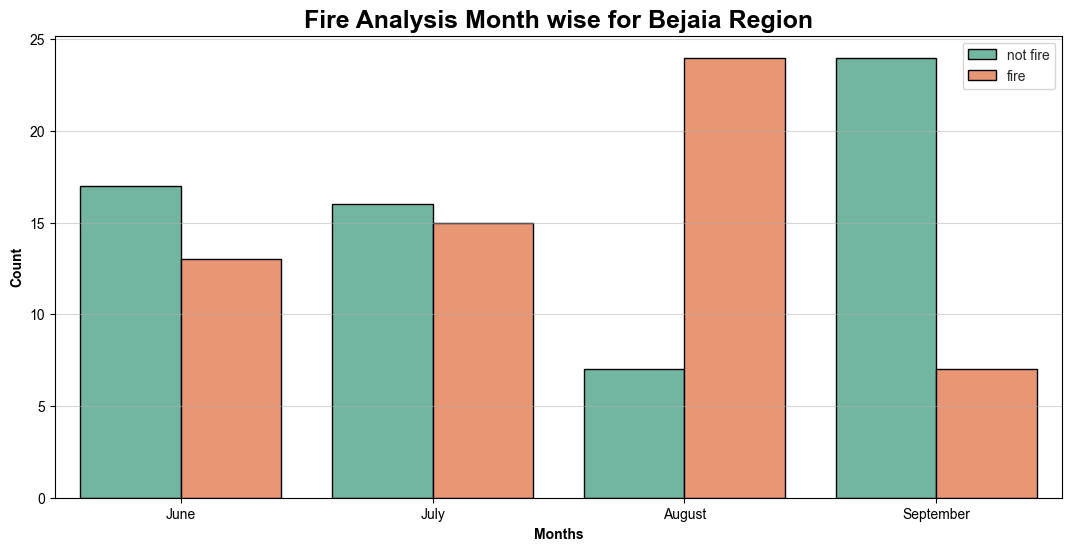

In [11]:
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Fire',data= data,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

In [12]:
#Droping Year features
data = data.drop(['day','month','year'], axis=1)

In [13]:
# Encoding Not fire as 0 and Fire as 1
data['Fire']= np.where(data['Fire']== 'not fire',0,1)

In [14]:
# Check counts
data.Fire.value_counts()

Fire
0    64
1    59
Name: count, dtype: int64

c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


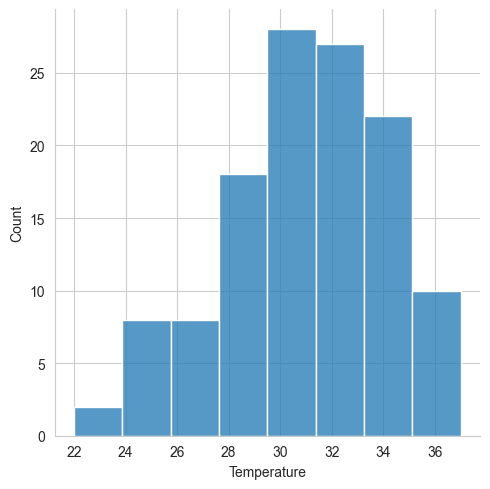

In [15]:
#Data Visualization.
sns.displot(data["Temperature"])

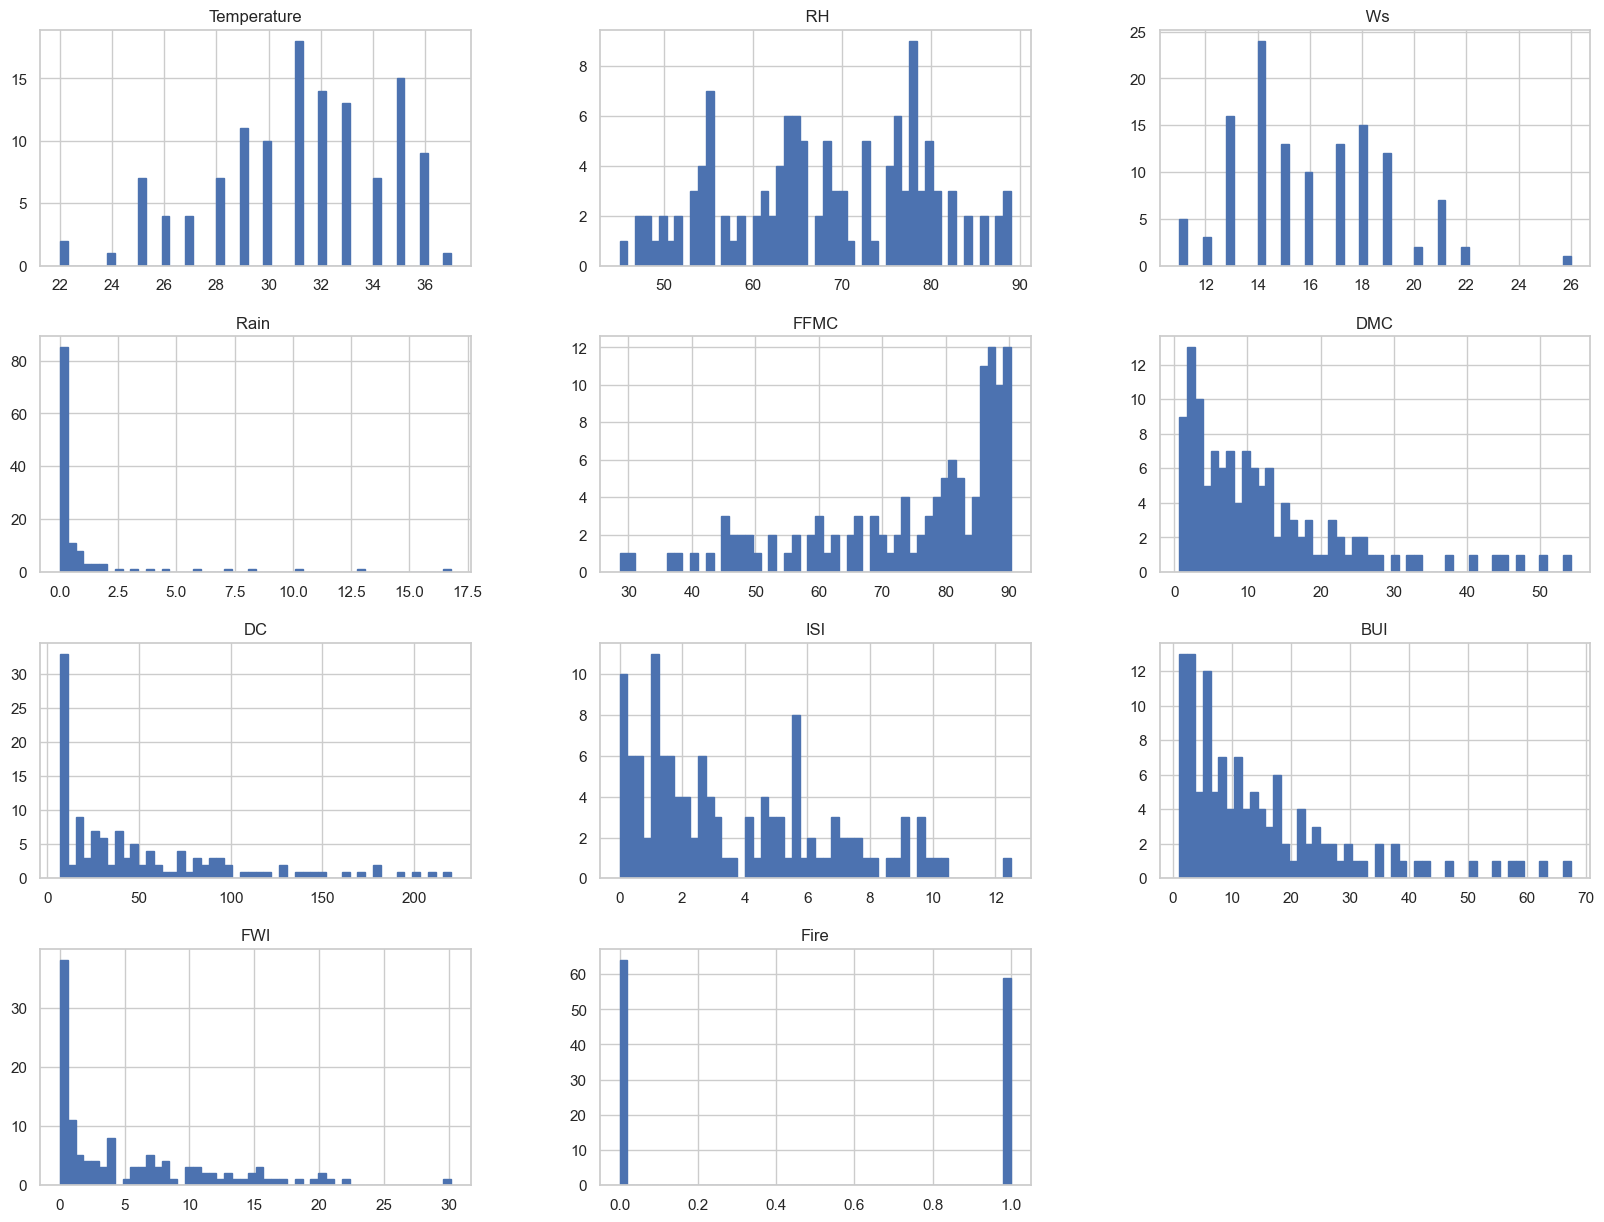

In [16]:
# PLot density plot for all features
sns.set(style='whitegrid')  # Set seaborn style

data.hist(bins=50, figsize=(20,15), ec='b')
plt.show()

In [17]:
# Percentage for PieChart
percentage_of_fire = data.Fire.value_counts(normalize=True)*100
percentage_of_fire

Fire
0    52.03252
1    47.96748
Name: proportion, dtype: float64

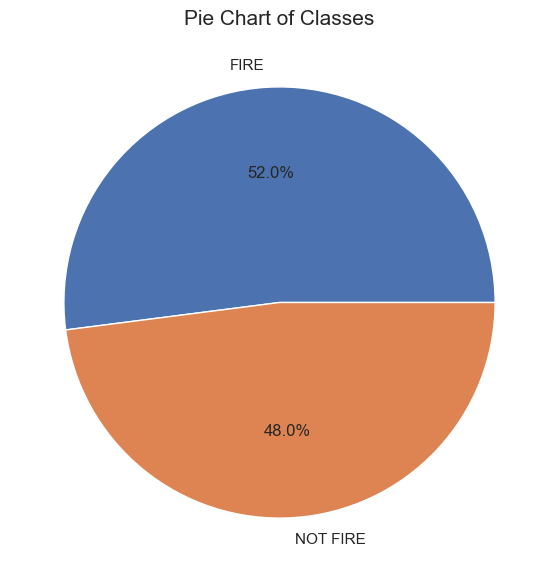

In [18]:
#plotting PieChart
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
plt.pie(percentage_of_fire,labels = classeslabels,autopct='%1.1f%%')
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show()

In [19]:
data.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Fire
Temperature,1.000000,-0.662304,-0.213870,-0.483551,0.755531,0.545953,0.536988,0.668274,0.546400,0.611037,0.503476
RH,-0.662304,1.000000,0.239327,0.329705,-0.655308,-0.351493,-0.318697,-0.589723,-0.342591,-0.479377,-0.381711
Ws,-0.213870,0.239327,1.000000,0.347213,-0.196778,0.044465,0.103766,-0.032445,0.067033,0.034432,-0.115191
Rain,-0.483551,0.329705,0.347213,1.000000,-0.568553,-0.266135,-0.284357,-0.366554,-0.272694,-0.293592,-0.334874
FFMC,0.755531,-0.655308,-0.196778,-0.568553,1.000000,0.611734,0.578577,0.791948,0.603810,0.676940,0.744810
DMC,0.545953,-0.351493,0.044465,-0.266135,0.611734,1.000000,0.962436,0.752097,0.995579,0.902384,0.619722
DC,0.536988,-0.318697,0.103766,-0.284357,0.578577,0.962436,1.000000,0.719708,0.982665,0.870717,0.591296
ISI,0.668274,-0.589723,-0.032445,-0.366554,0.791948,0.752097,0.719708,1.000000,0.748701,0.944212,0.833194
BUI,0.546400,-0.342591,0.067033,-0.272694,0.603810,0.995579,0.982665,0.748701,1.000000,0.901043,0.615301
FWI,0.611037,-0.479377,0.034432,-0.293592,0.676940,0.902384,0.870717,0.944212,0.901043,1.000000,0.761356


<Axes: >

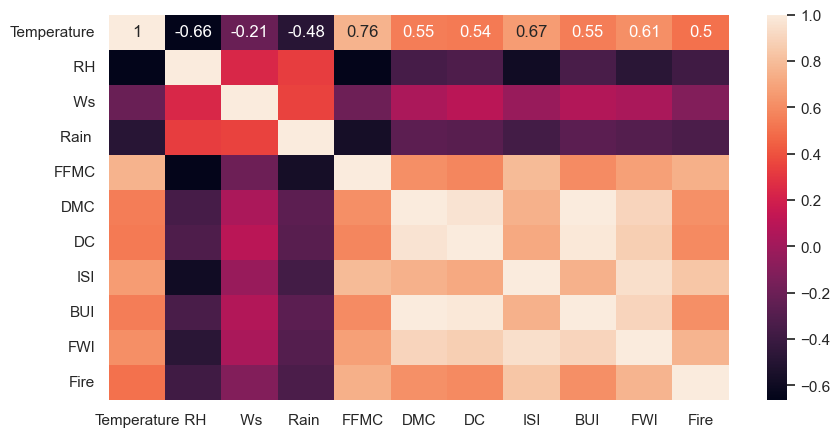

In [20]:
#specify size of heatmap
fig, ax = plt.subplots(figsize=(10, 5))

#create heatmap
sns.heatmap(data.corr(),annot=True)

In [29]:
X = data.drop('Fire',axis=1)
print(X)
y= data['Fire']

     Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  BUI  FWI
0             29   57   18    0.0  65.7  3.4   7.6  1.3  3.4  0.5
1             29   61   13    1.3  64.4  4.1   7.6  1.0  3.9  0.4
2             26   82   22   13.1  47.1  2.5   7.1  0.3  2.7  0.1
3             25   89   13    2.5  28.6  1.3   6.9  0.0  1.7  0.0
4             27   77   16    0.0  64.8  3.0  14.2  1.2  3.9  0.5
..           ...  ...  ...    ...   ...  ...   ...  ...  ...  ...
118           31   66   11    0.0  85.7  8.3  24.9  4.0  9.0  4.1
119           32   47   14    0.7  77.5  7.1   8.8  1.8  6.8  0.9
120           26   80   16    1.8  47.4  2.9   7.7  0.3  3.0  0.1
121           25   78   14    1.4  45.0  1.9   7.5  0.2  2.4  0.1
122           25   78   14    1.4  45.0  1.9   7.5  0.2  2.4  0.1

[123 rows x 10 columns]


In [30]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
print(X_train)
X_train.shape, X_test.shape

     Temperature   RH   Ws  Rain   FFMC   DMC     DC  ISI   BUI   FWI
62            35   55   12    0.4  78.0   5.8   10.0  1.7   5.5   0.8
59            31   79   15    0.0  85.4  28.5  136.0  4.7  37.4  10.7
43            34   61   13    0.6  73.9   7.8   22.9  1.4   8.4   0.8
51            28   79   18    0.1  73.4  16.4   79.9  1.8  21.7   2.8
3             25   89   13    2.5  28.6   1.3    6.9  0.0   1.7   0.0
..           ...  ...  ...    ...   ...   ...    ...  ...   ...   ...
67            32   69   16    0.0  86.5  15.5   48.6  5.5  17.2   8.0
64            34   69   13    0.0  85.0   8.2   19.8  4.0   8.2   3.9
117           31   54   11    0.0  82.0   6.0   16.3  2.5   6.2   1.7
47            31   68   14    0.0  85.4  12.1   43.1  4.6  14.2   6.0
44            30   80   19    0.4  60.7   5.2   17.0  1.1   5.9   0.5

[92 rows x 10 columns]


((92, 10), (31, 10))

In [31]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

In [32]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
mae = mean_absolute_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)


print("Random Forest Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))



Random Forest Regressor
R2 Score value: 0.9328
MAE value: 0.0377


In [37]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
param_grid =[{'bootstrap': [True, False],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,120],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 3, 4],
'min_samples_split': [2, 6, 10],
'n_estimators': [5, 20, 50, 100]}]

f_reg = RandomForestRegressor()
Random_rf = RandomizedSearchCV(f_reg,param_grid, cv = 10, verbose=2,n_jobs = -1)
Random_rf.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110,
                                                       120],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 3, 4],
                                         'min_samples_split': [2, 6, 10],
                                         'n_estimators': [5, 20, 50, 100]}],
                   verbose=2)

In [38]:
best_random_grid=Random_rf.best_estimator_

bestrf_pred = best_random_grid.predict(X_test_scaled)
mae = mean_absolute_error(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)


print("Random Forest Tuned")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Tuned
R2 Score value: 0.9321
MAE value: 0.0522


In [36]:
print(rf_pred)
print(y_test)

[1.   0.   1.   1.   0.   0.   0.77 1.   0.   0.   0.   1.   0.26 1.
 0.   0.05 1.   1.   0.   0.   1.   0.   1.   0.   0.   0.   0.   0.37
 1.   1.   1.  ]
85     1
98     0
10     1
71     1
8      0
45     0
22     1
7      1
61     0
91     0
114    0
110    1
33     0
66     1
2      0
90     0
89     1
24     1
122    0
30     0
78     1
100    0
60     1
16     0
97     0
113    0
13     0
76     1
73     1
26     1
56     1
Name: Fire, dtype: int32


In [39]:
rf.predict([[35,55,12,0.4,78.0,5.8,10.0,1.7,5.5,0.8]])

array([0.9])

In [40]:
rf.predict([[25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0]])

array([0.87])